In [1]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

Axes(0.125,0.125;0.775x0.775)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


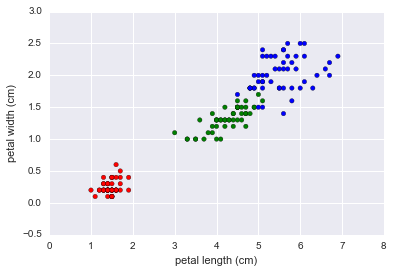

In [3]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.describe()

def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)

### Plot a similar plot with petal length and sepal width. Try out other combinations to see what makes each flower type unique

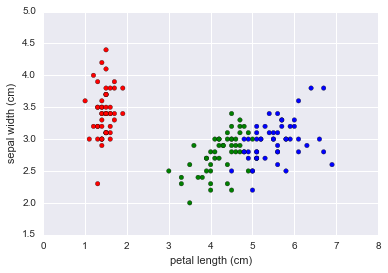

In [4]:
irisdf.plot('petal length (cm)', 'sepal width (cm)', kind='scatter', c=irisdf.ctarget)

In [4]:
irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.666666666667


### More specific solution

For the class, this solution is as simple it really needs to be in order to get a very good prediction score. But: Why, or when, does this fail? What attributes make this a great data set for learning classification algorithms? What makes it not as great?

In [5]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    elif row['petal length (cm)'] < 5:
        return 1
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.946666666667


### Using distance: KNN implementation

In [6]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.96


Do we see a change in performaance with using the distance weight?

In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.993333333333


### Try using different distance measures such as Manhattan? Tip: Check out http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [26]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.96


### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive; note that the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [49]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?
k = range(2, 100)
params = {'n_neighbors': k }
kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)
gs.grid_scores_


[mean: 0.90667, std: 0.09752, params: {'n_neighbors': 2},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 3},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 4},
 mean: 0.91333, std: 0.08327, params: {'n_neighbors': 5},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 6},
 mean: 0.92000, std: 0.08589, params: {'n_neighbors': 7},
 mean: 0.91333, std: 0.08844, params: {'n_neighbors': 8},
 mean: 0.92000, std: 0.09092, params: {'n_neighbors': 9},
 mean: 0.92000, std: 0.09092, params: {'n_neighbors': 10},
 mean: 0.91333, std: 0.08589, params: {'n_neighbors': 11},
 mean: 0.89333, std: 0.10625, params: {'n_neighbors': 12},
 mean: 0.90667, std: 0.08273, params: {'n_neighbors': 13},
 mean: 0.90000, std: 0.09428, params: {'n_neighbors': 14},
 mean: 0.90000, std: 0.09428, params: {'n_neighbors': 15},
 mean: 0.88667, std: 0.11851, params: {'n_neighbors': 16},
 mean: 0.88000, std: 0.12754, params: {'n_neighbors': 17},
 mean: 0.86667, std: 0.12111, params: {'n_neighbors': 18},
 mean

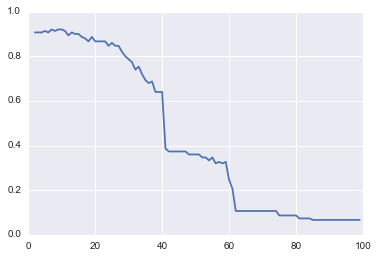

In [50]:
plt.plot(k,[s[1] for s in  gs.grid_scores_],)

Zoom in to look at fit before first dive around 25:

In [52]:
gs.best_params_

{'n_neighbors': 7}

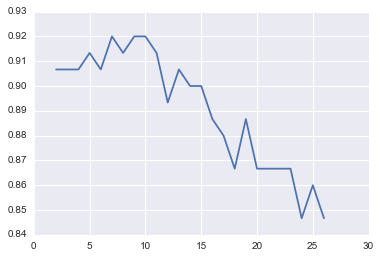

In [53]:
plt.plot(k[:25],[s[1] for s in  gs.grid_scores_][:25],)